***Reference:***

**Kapoor, Amita; Gulli, Antonio; Pal, Sujit. Deep Learning with TensorFlow and Keras: Build and deploy supervised, unsupervised, deep, and reinforcement learning models, 3rd Edition . Packt Publishing.**

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 

import matplotlib.pyplot as plt

print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.10.1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
((train_data, train_labels),(test_data, test_labels)) = tf.keras.datasets.mnist.load_data()

In [3]:
train_data = train_data/np.float32(255)
train_labels = train_labels.astype(np.int32)  

test_data = test_data/np.float32(255)
test_labels = test_labels.astype(np.int32)

In [4]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

The `Flatten` layers helps to resize the $28 \times 28$ 2D input images to 784 flattened array

In [5]:
# Build a LOGISTIC Reg. model thus activation='sigmoid'
model = keras.Sequential([layers.Flatten(input_shape=(28,28)),
                          layers.Dense(10, activation='sigmoid')])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(x=train_data, y=train_labels, 
                    epochs=50, verbose=1, 
                    validation_split=0.2)

Epoch 1/50


C:\Users\Amit Vikram Raj\AppData\Roaming\Python\Python310\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1500/1500 [==============================] - 5s 2ms/step - loss: 0.5138 - accuracy: 0.8659 - val_loss: 0.3187 - val_accuracy: 0.9117
Epoch 2/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3178 - accuracy: 0.9120 - val_loss: 0.2889 - val_accuracy: 0.9211
Epoch 3/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2930 - accuracy: 0.9180 - val_loss: 0.2754 - val_accuracy: 0.9238
Epoch 4/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2818 - accuracy: 0.9209 - val_loss: 0.2716 - val_accuracy: 0.9260
Epoch 5/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2734 - accuracy: 0.9234 - val_loss: 0.2663 - val_accuracy: 0.9280
Epoch 6/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2680 - accuracy: 0.9251 - val_loss: 0.2657 - val_accuracy: 0.9279
Epoch 7/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2642 - accuracy: 0.9254 - val_loss: 0.2649 - val_accuracy: 0.9270
Epo

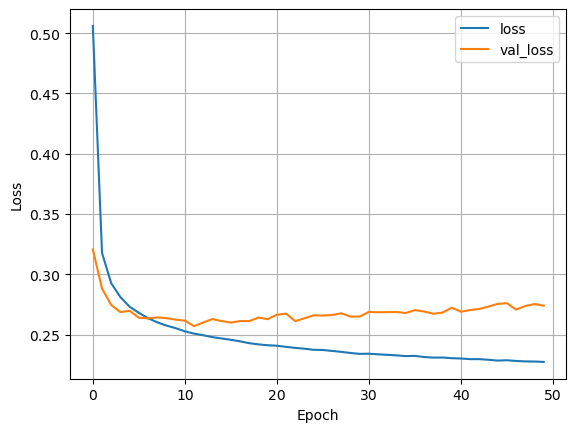

In [9]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True);

# Overfitting

In [10]:
predictions = model.predict(test_data)

313/313 [==============================] - 0s 930us/step


In [22]:
np.argmax(predictions, axis=-1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [28]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("Predicted: {}, Confidence: {:2.0f}%, True: ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

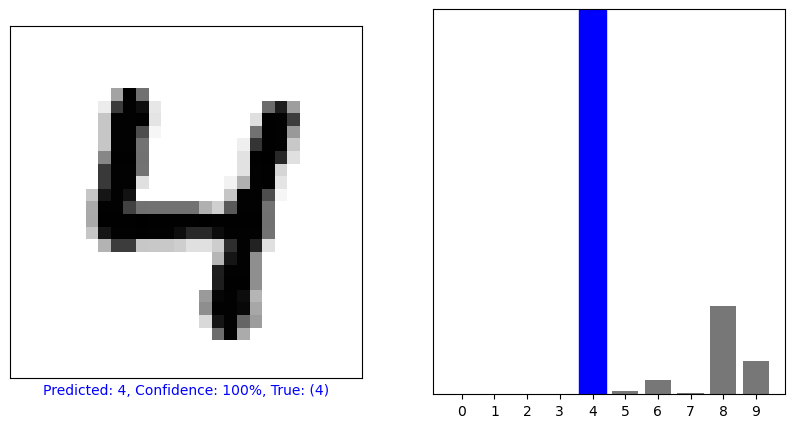

In [29]:
i = 56
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_data)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [34]:
better_model = keras.Sequential([layers.Flatten(input_shape=(28,28)),
                                 layers.Dense(128, activation='relu'),
                                 layers.Dense(10, activation='softmax')])

better_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [35]:
better_model.compile(optimizer='adam',
                     loss=keras.losses.SparseCategoricalCrossentropy(),
                     metrics=['accuracy'])

history = better_model.fit(train_data, train_labels,
                           epochs=10, verbose=1,
                           validation_split=0.2, 
                           use_multiprocessing=True)

Epoch 1/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2842 - accuracy: 0.9182 - val_loss: 0.1564 - val_accuracy: 0.9553
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1264 - accuracy: 0.9630 - val_loss: 0.1196 - val_accuracy: 0.9662
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0888 - accuracy: 0.9735 - val_loss: 0.1059 - val_accuracy: 0.9693
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0653 - accuracy: 0.9802 - val_loss: 0.0956 - val_accuracy: 0.9704
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0509 - accuracy: 0.9847 - val_loss: 0.0870 - val_accuracy: 0.9747
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0385 - accuracy: 0.9877 - val_loss: 0.0958 - val_accuracy: 0.9713
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0310 - accuracy: 0.9908 - val_loss: 0.0875 - val_accuracy:

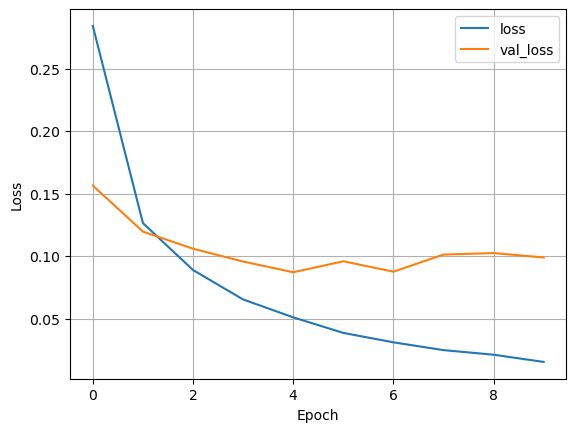

In [36]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True);

313/313 [==============================] - 0s 1ms/step


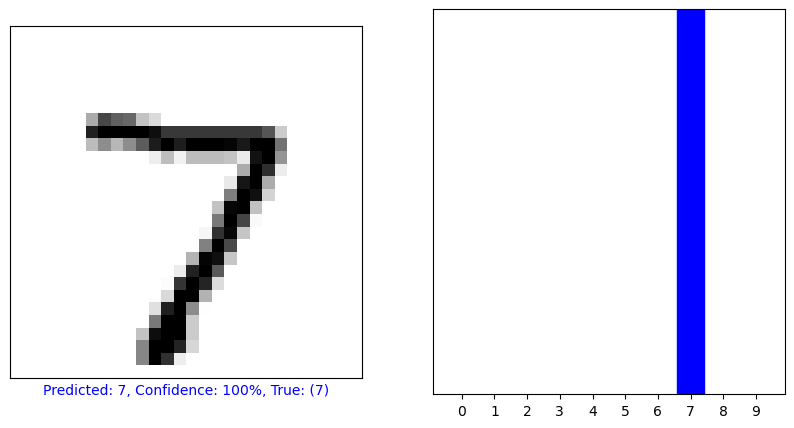

In [37]:
predictions = better_model.predict(test_data)

i = 0
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_data)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show();